<a href="https://colab.research.google.com/github/adityasyazi/googlecolab/blob/main/Yazi_Adityas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## afia[at]ugm.ac.id
## Materi TOT hari ke-4 Sesi 2,  25 Februari 2020
## Import Numpy dan Tensorflow Keras

In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

## Load dataset MNIST

In [2]:
(x_train, y_train), (x_validation, y_validation) = keras.datasets.mnist.load_data()

print(x_train.shape, x_validation.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28) (10000, 28, 28)


## Sampling Train 8000 dan Validasi 2000, ambil 1 data untuk testing nantinya

In [4]:
x_train = x_train[:800]
y_train = y_train[:800]
x_validation = x_validation[:200]
y_validation = y_validation[:200]

print(x_train.shape, x_validation.shape)

(800, 28, 28) (200, 28, 28)


In [6]:
x_test = x_train[-1]
y_test = y_train[-1]

viz_test = x_test

## Plot 9 data pertama

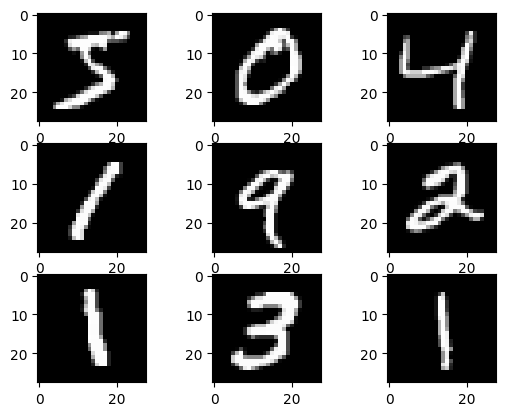

In [7]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

plt.show()

## Normalisasi 0-255 menjadi 0-1

In [8]:
x_train = x_train.astype("float32") / 255
x_validation = x_validation.astype("float32") / 255
x_test = x_test.astype("float32") / 255

## Reshape data dari (28, 28) menjadi (28, 28, 1)
mandatory karena convolution layer keras membutuhkan angka terakhir sebagai channel (1 bw atau 3 rgb sebagai contoh)

In [9]:
x_train = np.expand_dims(x_train, -1)             # expand_dims(x_train, -1) ini sama saja dengan  x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_validation = np.expand_dims(x_validation, -1)

print(x_train.shape, x_validation.shape)

(800, 28, 28, 1) (200, 28, 28, 1)


## One-hot encode label

In [10]:
y_train = keras.utils.to_categorical(y_train, 10) #10 karena banyak kelas 10 (0 sampai 9)
y_validation = keras.utils.to_categorical(y_validation, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Bentuk Model

In [11]:
batch_size = 128
num_steps = 2000

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │         108,180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,710 (424.65 KB)

 Trainable params: 108,710 (424.65 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 281ms/step - accuracy: 0.1531 - loss: 2.2941 - val_accuracy: 0.2600 - val_loss: 2.2719
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2183 - loss: 2.2765 - val_accuracy: 0.3100 - val_loss: 2.2504
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2910 - loss: 2.2507 - val_accuracy: 0.2950 - val_loss: 2.2271
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2987 - loss: 2.2262 - val_accuracy: 0.3200 - val_loss: 2.2035
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3234 - loss: 2.1991 - val_accuracy: 0.3200 - val_loss: 2.1781
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3452 - loss: 2.1736 - val_accuracy: 0.3450 - val_loss: 2.1533
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3985 - loss: 2.1431 - val_accuracy: 0.3750 - val_loss: 2.1265
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3935 - loss: 2.1128 - val_accuracy: 0.3750 - val_loss: 2.0956
Epoch

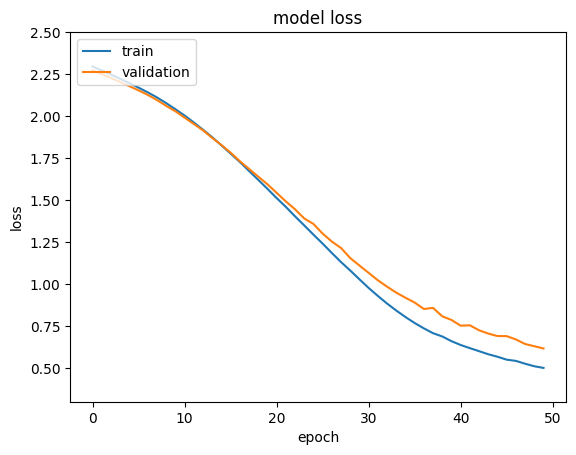

In [12]:
model = keras.Sequential()
model.add(keras.Input(shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) #10 sesuai jumlah kelas, output one-hot encode

model.summary()

sgd = keras.optimizers.SGD(
  learning_rate=0.01,
)

# compile model
model.compile(
  loss="categorical_crossentropy",
  optimizer=sgd,
  metrics=["accuracy"]
)

# latih model
history = model.fit(
  x = x_train,
  y = y_train,
  epochs = 50,
  batch_size = 128,
  validation_data=(x_validation, y_validation)
)

# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim(ymax=2.5, ymin=0.3)
plt.show()

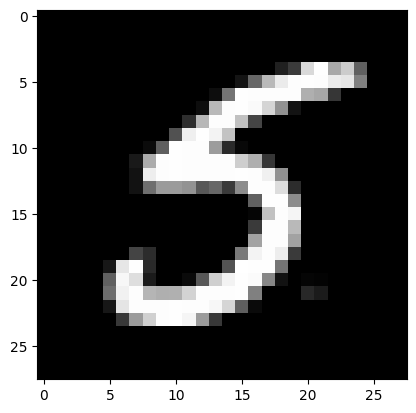

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
image terdeteksi sebagai angka  5


In [13]:
plt.imshow(viz_test, cmap=plt.get_cmap('gray'))
plt.show()

x_test = np.expand_dims(x_test, -1)
x_test = np.expand_dims(x_test, axis=0)

result = model.predict(x_test)
result = np.argmax(result, axis = 1)
print("image terdeteksi sebagai angka ",result[0])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │         108,180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,710 (424.65 KB)

 Trainable params: 108,710 (424.65 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.1069 - loss: 2.3019 - val_accuracy: 0.1000 - val_loss: 2.2955
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1076 - loss: 2.2996 - val_accuracy: 0.1050 - val_loss: 2.2941
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1235 - loss: 2.2986 - val_accuracy: 0.1150 - val_loss: 2.2929
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1213 - loss: 2.2962 - val_accuracy: 0.1250 - val_loss: 2.2916
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1405 - loss: 2.2937 - val_accuracy: 0.1300 - val_loss: 2.2902
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1474 - loss: 2.2933 - val_accuracy: 0.1400 - val_loss: 2.2888
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1357 - loss: 2.2953 - val_accuracy: 0.1500 - val_loss: 2.2874
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1622 - loss: 2.2897 - val_accuracy: 0.1600 - val_loss: 2.2860
Epoch

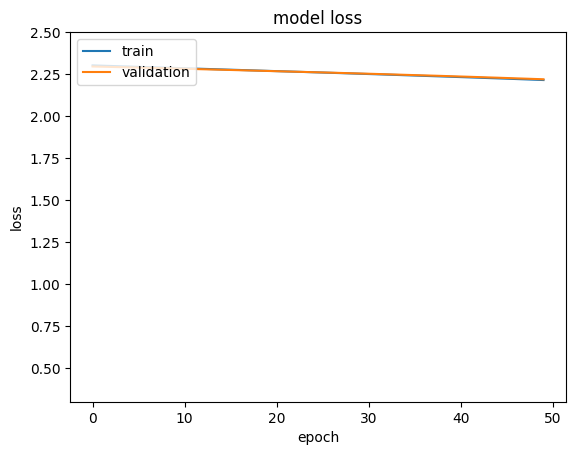

In [14]:
model = keras.Sequential()
model.add(keras.Input(shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) #10 sesuai jumlah kelas, output one-hot encode

model.summary()

sgd = keras.optimizers.SGD(
  learning_rate=0.001,
)

# compile model
model.compile(
  loss="categorical_crossentropy",
  optimizer=sgd,
  metrics=["accuracy"]
)

# latih model
history = model.fit(
  x = x_train,
  y = y_train,
  epochs = 50,
  batch_size = 128,
  validation_data=(x_validation, y_validation)
)

# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim(ymax=2.5, ymin=0.3)
plt.show()

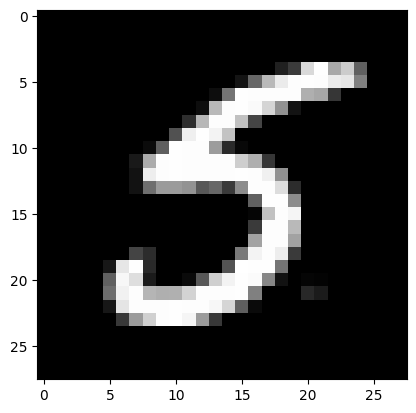

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
image terdeteksi sebagai angka  0


In [15]:
plt.imshow(viz_test, cmap=plt.get_cmap('gray'))
plt.show()

result = model.predict(x_test)
result = np.argmax(result, axis = 1)
print("image terdeteksi sebagai angka ",result[0])